In [1]:
%matplotlib inline


# Contour Label Demo


Illustrate some of the more advanced things that one can do with
contour labels.

See also the :doc:`contour demo example
</gallery/images_contours_and_fields/contour_demo>`.



In [2]:
import matplotlib
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

Define our surface



In [12]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = X*X+Y*Y

Make contour labels using creative float classes
Follows suggestion of Manuel Metz



<a list of 11 text.Text objects>

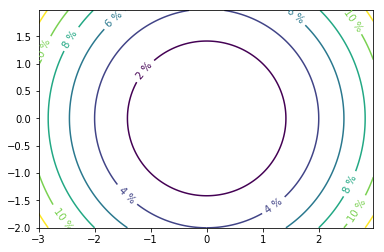

In [13]:
# Define a class that forces representation of float to look a certain way
# This remove trailing zero so '1.0' becomes '1'


class nf(float):
    def __repr__(self):
        str = '%.1f' % (self.__float__(),)
        if str[-1] == '0':
            return '%.0f' % self.__float__()
        else:
            return '%.1f' % self.__float__()


# Basic contour plot
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

# Recast levels to new class
CS.levels = [nf(val) for val in CS.levels]

# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r \%%'
else:
    fmt = '%r %%'

ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)

Label contours with arbitrary strings using a dictionary



<a list of 7 text.Text objects>

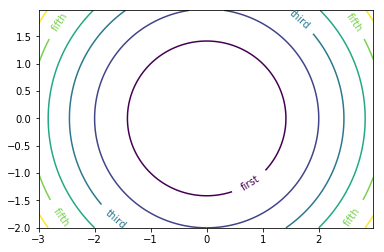

In [14]:
fig1, ax1 = plt.subplots()

# Basic contour plot
CS1 = ax1.contour(X, Y, Z)

fmt = {}
strs = ['first', 'second', 'third', 'fourth', 'fifth', 'sixth', 'seventh']
for l, s in zip(CS1.levels, strs):
    fmt[l] = s

# Label every other level using strings
ax1.clabel(CS1, CS1.levels[::2], inline=True, fmt=fmt, fontsize=10)

Use a Formatter



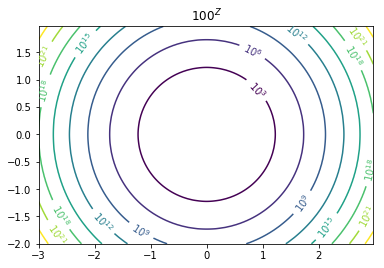

In [15]:
fig2, ax2 = plt.subplots()

CS2 = ax2.contour(X, Y, 100**Z, locator=plt.LogLocator())
fmt = ticker.LogFormatterMathtext()
fmt.create_dummy_axis()
ax2.clabel(CS2, CS2.levels, fmt=fmt)
ax2.set_title("$100^Z$")

plt.show()

------------

References
""""""""""

The use of the following functions, methods and classes is shown
in this example:



In [7]:
matplotlib.axes.Axes.contour
matplotlib.pyplot.contour
matplotlib.axes.Axes.clabel
matplotlib.pyplot.clabel
matplotlib.ticker.LogFormatterMathtext
matplotlib.ticker.TickHelper.create_dummy_axis

<function matplotlib.ticker.TickHelper.create_dummy_axis(self, **kwargs)>